# H 4L_Ana_Example
Fit example.




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, March 29, 2021 at 08:08 PM.</small></i>

Import the ROOT libraries

In [7]:
import ROOT as R
from math import pow, sqrt
R.gROOT.SetStyle("ATLAS")

Open the root file, which contains a simple TTree

In [8]:
fname = "mc_160155.ggH125_ZZ4lep.root"
tfin = R.TFile.Open(fname, "READ")
tr = tfin.Get("mini")

nevents = tr.GetEntries()
print("Num. of events in file {0}: {1}".format(nevents, fname))

hname = "m4l"
nbins, xmin, xmax = 100, 110, 130
h_m4l = R.TH1F(hname, hname, nbins, xmin, xmax)
h_m4l.Sumw2()

Num. of events in file 100000: mc_160155.ggH125_ZZ4lep.root


Loop all events

In [9]:
nevt_max = min(nevents, 1000)
for ie in range(nevt_max):
  tr.GetEntry(ie)

  # Event weight
  wt = tr.mcWeight
  
  # 4-momentum of leptons
  tlz_leps = []
  for il in range(len(tr.lep_pt)):    
    tlz_l = R.TLorentzVector()
    tlz_l.SetPtEtaPhiE(tr.lep_pt[il], tr.lep_eta[il], tr.lep_phi[il], tr.lep_E[il])

    tlz_leps.append(tlz_l)

  tlz_4l = R.TLorentzVector()
  for tlz in tlz_leps: tlz_4l += tlz

  # the invariant mass
  m4l = tlz_4l.M()*1e-3 # MeV -> GeV
  h_m4l.Fill(m4l, wt)

Plotting

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file m4l_test.png has been created


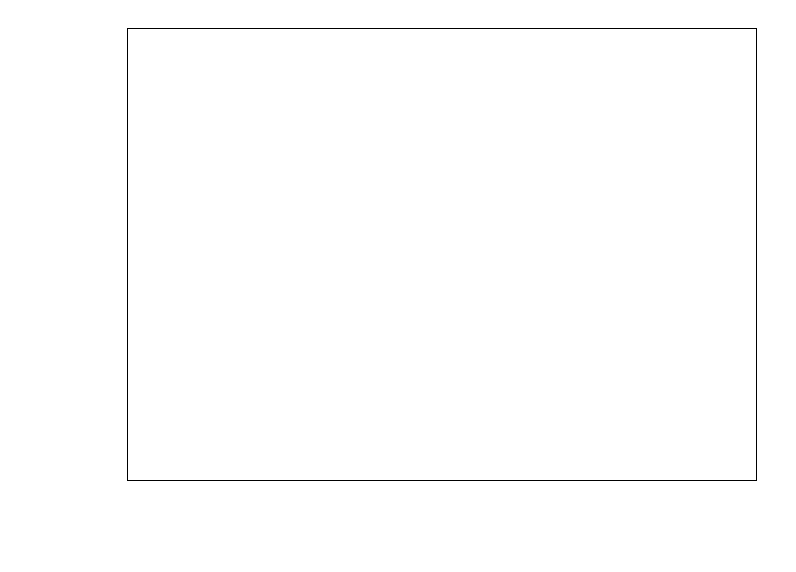

In [12]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)

myc.cd()
h_m4l.Draw()
myc.Draw()
myc.SaveAs("m4l_test.png")

tfin.Close()

Draw all canvases 

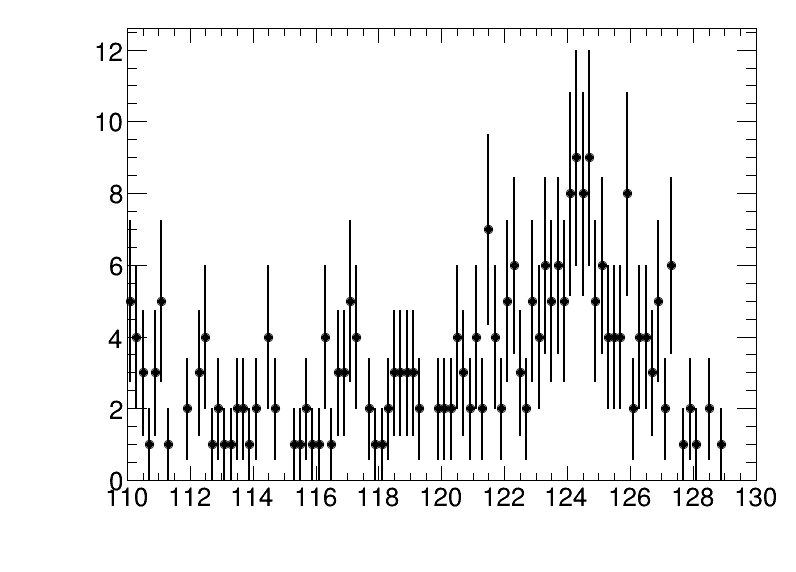

In [11]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()